# Exploratory Data Analysis

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Assignments\SVM\mushroom.csv")

In [3]:
df.head()

,Unnamed,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df = df.drop(['Unnamed'], axis =1)

In [5]:
# Here we will be removing stalk_height and cap_diameter, as it is continuous numerical data and svm is best used for claasification

df = df.drop(['stalk_height', 'cap_diameter'], axis =1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap_shape                 2000 non-null   object
 1   cap_surface               2000 non-null   object
 2   cap_color                 2000 non-null   object
 3   bruises                   2000 non-null   object
 4   odor                      2000 non-null   object
 5   gill_attachment           2000 non-null   object
 6   gill_spacing              2000 non-null   object
 7   gill_size                 2000 non-null   object
 8   gill_color                2000 non-null   object
 9   stalk_shape               2000 non-null   object
 10  stalk_root                2000 non-null   object
 11  stalk_surface_above_ring  2000 non-null   object
 12  stalk_surface_below_ring  2000 non-null   object
 13  stalk_color_above_ring    2000 non-null   object
 14  stalk_color_below_ring  

In [7]:
df.shape

(2000, 23)

In [8]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
dtype: int64

# Data Preprocessing

In [33]:
# Encoding categorical variables

le = LabelEncoder()
for i in df:
  if df[i].dtypes=='object':
    df[i] = le.fit_transform(df[i])


In [11]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1


In [12]:
df.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,0.480000,...,3.943000,4.090000,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000
std,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,0.499725,...,2.594825,2.601977,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,0.000000,...,2.000000,2.000000,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,0.000000,...,4.000000,4.000000,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000
75%,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,1.000000,...,6.000000,6.000000,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000
max,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,1.000000,...,8.000000,8.000000,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000


# Data Visualization

<Axes: xlabel='class', ylabel='count'>

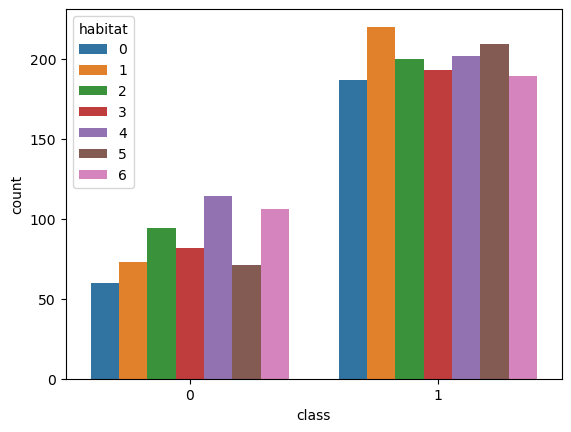

In [13]:
sns.countplot(x = 'class' ,hue ='habitat' ,data =df)

<Axes: xlabel='class', ylabel='Count'>

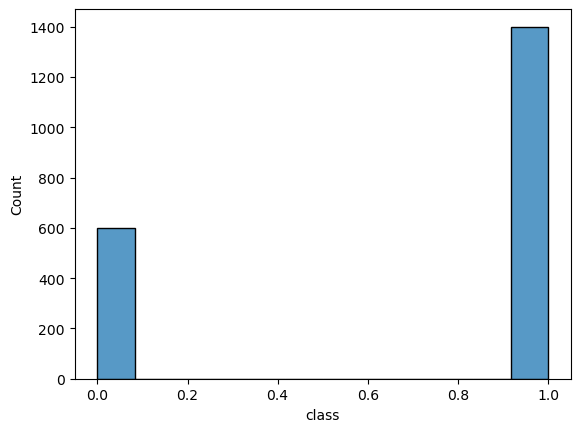

In [14]:
sns.histplot(df['class'])

<Axes: xlabel='ring_number', ylabel='Count'>

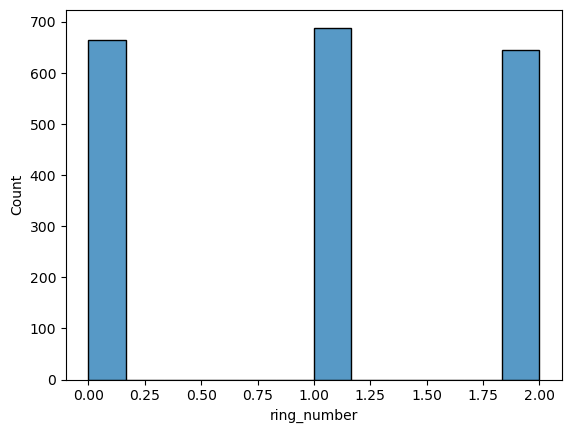

In [15]:
sns.histplot(df['ring_number'])

<Axes: >

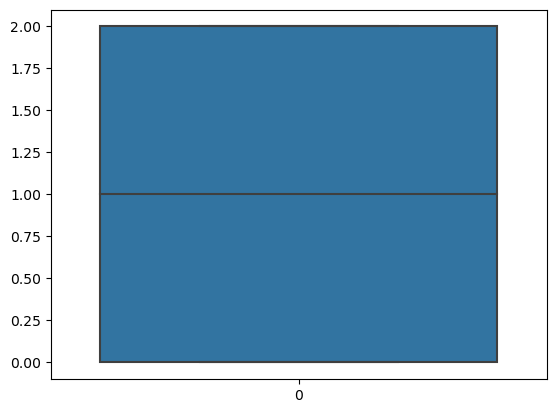

In [16]:
sns.boxplot(df['ring_number'])

<Axes: >

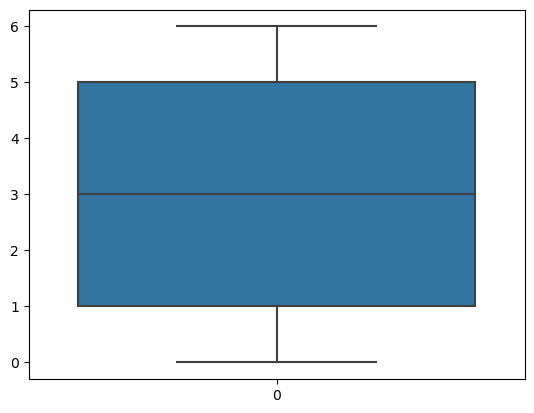

In [17]:
sns.boxplot(df['habitat'])

C:\Users\sahil\AppData\Local\Temp\ipykernel_2440\729556929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

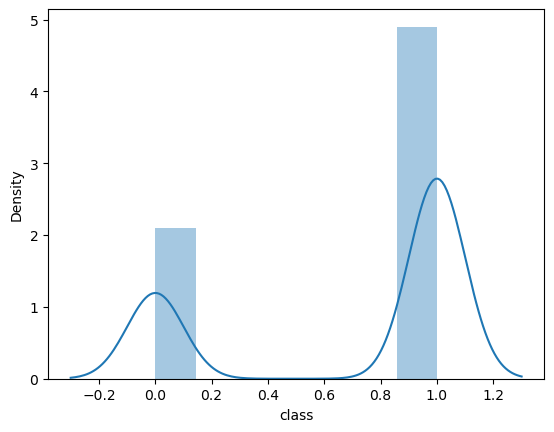

In [18]:
sns.distplot(df['class'])

C:\Users\sahil\AppData\Local\Temp\ipykernel_2440\1149421609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ring_number'])


<Axes: xlabel='ring_number', ylabel='Density'>

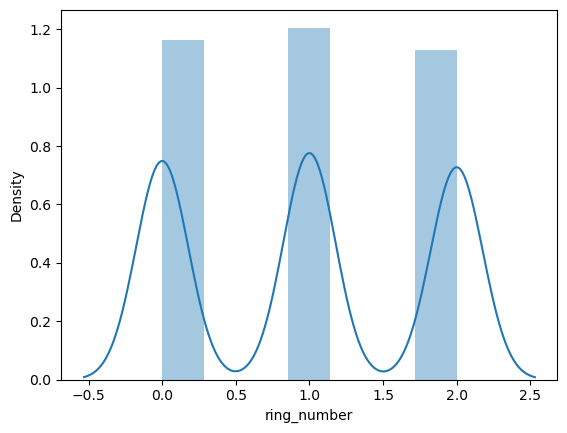

In [19]:
sns.distplot(df['ring_number'])

In [20]:
df.corr()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
cap_shape,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,0.011573,...,-0.021350,0.027522,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140
cap_surface,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,-0.024032,...,-0.048534,-0.011742,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409
cap_color,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,-0.020397,...,0.038920,0.036951,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029
bruises,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,0.007928,...,0.009374,-0.077316,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498
odor,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,0.009072,...,-0.006393,-0.007103,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536
gill_attachment,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,-0.018698,...,0.011811,0.007839,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194
gill_spacing,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,0.051041,...,-0.045491,0.003012,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505
gill_size,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,-0.046759,...,-0.067307,-0.025614,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858
gill_color,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,-0.056446,...,0.076840,0.050684,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083
stalk_shape,0.011573,-0.024032,-0.020397,0.007928,0.009072,-0.018698,0.051041,-0.046759,-0.056446,1.000000,...,0.025740,0.046013,0.004404,-0.051294,0.014983,0.011554,0.027410,-0.000393,-0.054938,0.024023


<Axes: >

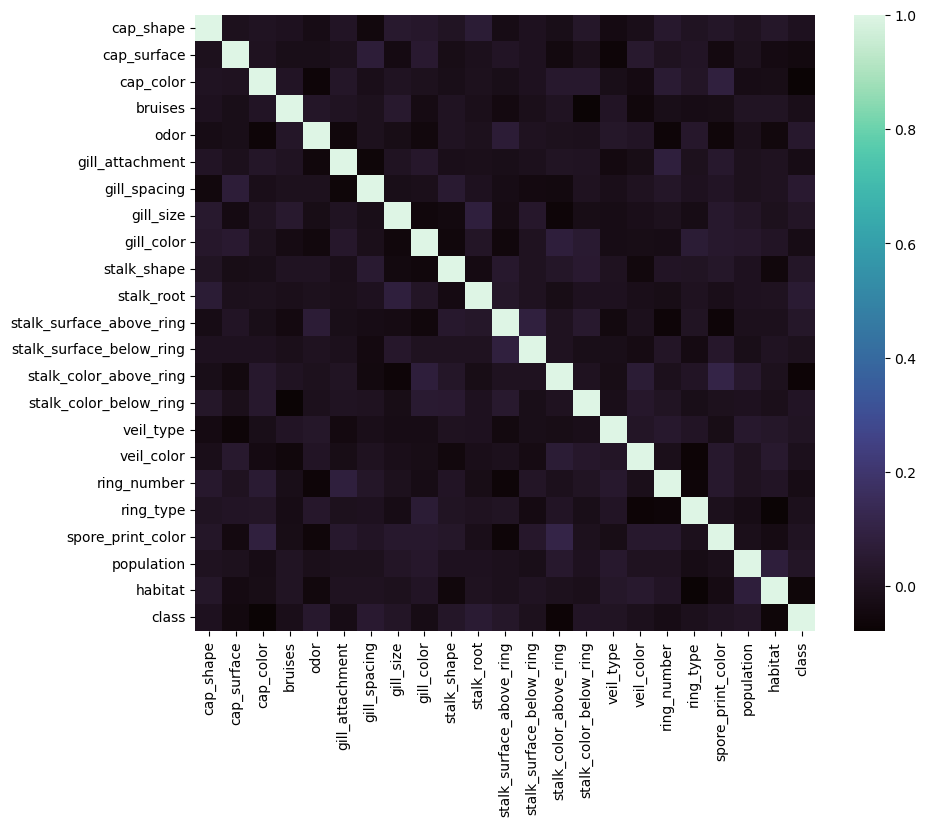

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='mako')

In [22]:
df.columns


Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

In [23]:
X = df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat']]

In [24]:
X.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,4,2,7,0,1,1,2,0,7,1,...,2,3,8,0,0,2,6,3,1,5
1,4,0,6,0,1,3,1,1,3,0,...,2,2,0,1,0,2,6,1,2,5
2,3,1,5,1,4,1,1,0,8,1,...,2,8,3,1,3,2,6,6,0,5
3,0,2,4,1,3,3,0,0,6,0,...,1,8,5,0,3,2,0,4,1,0
4,3,3,8,1,5,2,1,1,6,0,...,1,3,7,1,2,0,4,8,1,4


In [25]:
Y = df['class']

In [26]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: class, dtype: int32

# SVM Implementation 

In [27]:
# Now split data into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 22) (1600, 22) (400, 22)


In [29]:
# Initializing and training the SVM model 

classifier_svm = SVC(kernel='poly', random_state=0)  
classifier_svm.fit(X_train, Y_train) 

SVC(kernel='poly', random_state=0)

In [30]:
# Evaluating model on test set

Y_pred = classifier_svm.predict(X_test) 
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [34]:
# Classification report

cm= confusion_matrix(Y_test, Y_pred)
clr = classification_report(Y_test, Y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.71      0.22      0.33       124
           1       0.73      0.96      0.83       276

    accuracy                           0.73       400
   macro avg       0.72      0.59      0.58       400
weighted avg       0.73      0.73      0.68       400



In [36]:
print(X_train.columns)


Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')


#  Visualization of SVM Results

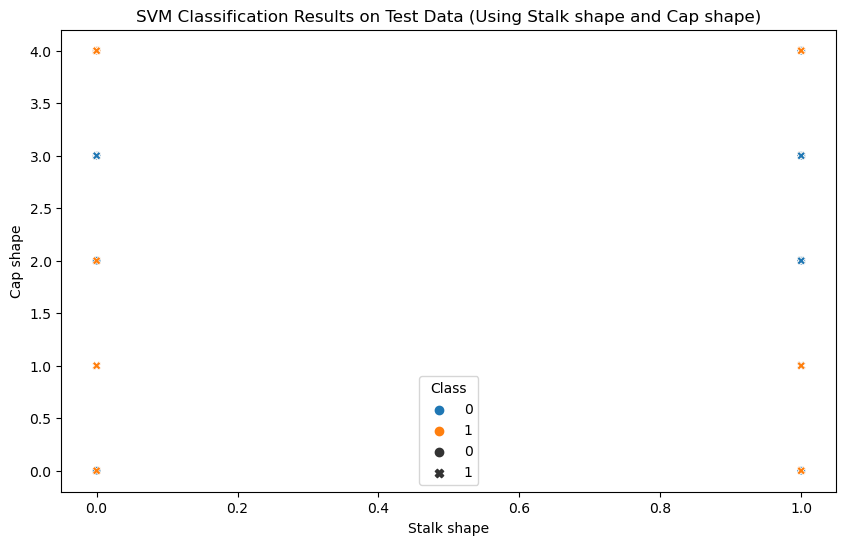

In [41]:
# Select two features for visualization
X_train_2D = X_train[['stalk_shape', 'cap_shape']]
X_test_2D = X_test[['stalk_shape', 'cap_shape']]

# Retrain model on 2D subset of features
svm_model_2D = SVC(kernel='poly')
svm_model_2D.fit(X_train_2D, Y_train)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_2D['stalk_shape'], y=X_test_2D['cap_shape'], hue=Y_test, style=Y_pred)
plt.title("SVM Classification Results on Test Data (Using Stalk shape and Cap shape)")
plt.xlabel("Stalk shape")
plt.ylabel("Cap shape")
plt.legend(title="Class")
plt.show()


# Parameter Tuning and Optimization

In [44]:
# from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']  # For non-linear kernels
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8574999999999999


# Comparison and Analysis

In [45]:
# Initialize a dictionary to store results
results = {}

# Loop through different kernel types
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm_model = SVC(kernel=kernel, C=grid_search.best_params_['C'], 
                    gamma=grid_search.best_params_['gamma'], random_state=42)
    svm_model.fit(X_train, Y_train)
    y_pred = svm_model.predict(X_test)
    
    # Store the performance metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    results[kernel] = accuracy
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy)
    print(classification_report(Y_test, Y_pred))
    print("\n" + "-"*50 + "\n")

# Display the results
print("Comparison of SVM Performance with Different Kernels:")
for kernel, accuracy in results.items():
    print(f"{kernel}: {accuracy:.4f}")


Kernel: linear
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.22      0.33       124
           1       0.73      0.96      0.83       276

    accuracy                           0.73       400
   macro avg       0.72      0.59      0.58       400
weighted avg       0.73      0.73      0.68       400


--------------------------------------------------

Kernel: poly
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.22      0.33       124
           1       0.73      0.96      0.83       276

    accuracy                           0.73       400
   macro avg       0.72      0.59      0.58       400
weighted avg       0.73      0.73      0.68       400


--------------------------------------------------

Kernel: rbf
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.22      0.33       124
           1       0.73      0.96      0.83   